# Hilbert  Transform

Let's start with a simple example of a signal to get better to grips with the Hilbert transform, and then move onto trying the transform on th SSN, recreating the results of Leamon et al. (2020).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

from scipy.signal import hilbert, chirp

In /home/exr007/.config/matplotlib/stylelib/paper.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/exr007/.config/matplotlib/stylelib/mnras.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


## Create sinusoidal data

Create a sinudoidal function, $u(t)$. Perform Hilbert tranform to achieve $\mathcal{H}[u(t)]$. Finally combine to acquire the analytic signal, $z(t)$, where:

$z(t) = u(t) + i\mathcal{H}[u(t)] = A(t) e^{i\phi(t)} = A(t) e^{i\omega(t)t}$

In [2]:
d = 24 * 3600
T = 50 * 365.2425 * 24 * 3600
t = np.arange(0, T, d)
P = 10 * 365.2425 * 24 * 3600
signal = 5.0 * np.sin(2.0 * np.pi * t / P)
#signal = 5.0 * np.cos(2.0 * np.pi * t / P)
len(signal)

18263

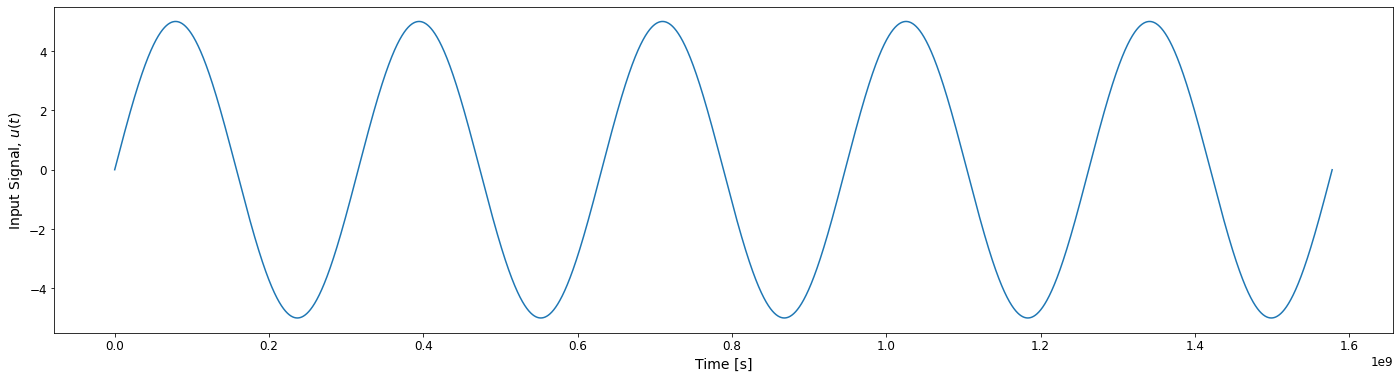

In [3]:
fig, ax = plt.subplots(figsize = [24, 6])
ax.set_ylabel('Input Signal, $u(t)$')
ax.set_xlabel('Time [s]')
ax.plot(t, signal)

In [4]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
#instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_phase = np.angle(analytic_signal)
#instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
analytic_signal

array([ 2.29079320e-15-4.98307959j,  8.60138430e-03-4.9878571j ,
        1.72027431e-02-4.98782852j, ..., -1.82779099e-02-4.98782391j,
       -9.67655607e-03-4.98785434j, -1.07517356e-03-4.98307867j])

Let's plot all of the outputs to see what this has produced...

/home/exr007/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


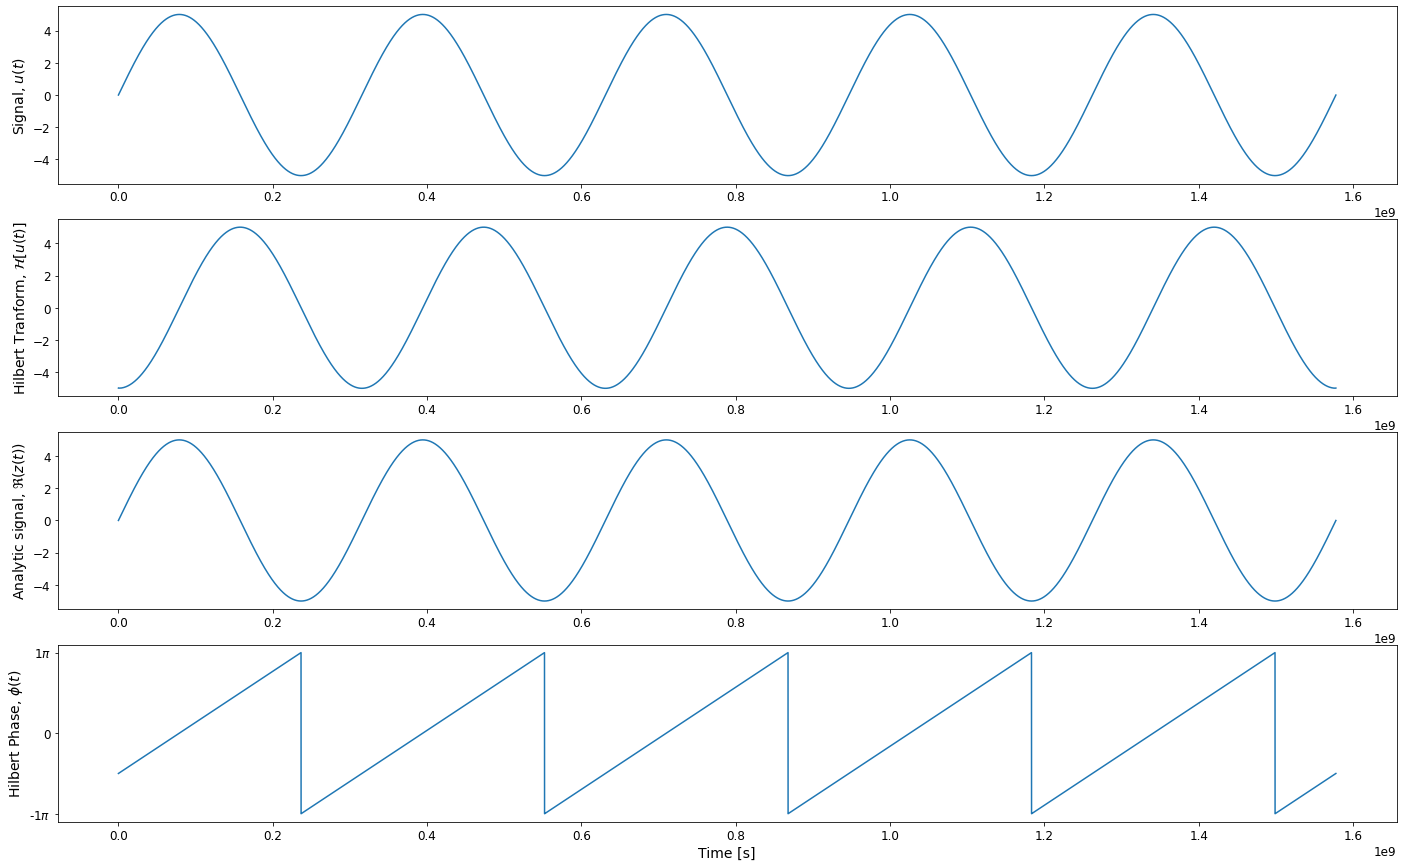

In [5]:
fig, axs= plt.subplots(4, 1, figsize = [24, 15])
axs[0].set_ylabel('Signal, $u(t)$')
axs[1].set_ylabel('Hilbert Tranform, $\mathcal{H}[u(t)]$')
axs[2].set_ylabel('Analytic signal, $\Re(z(t))$')
axs[3].set_ylabel('Hilbert Phase, $\phi(t)$')
axs[-1].set_xlabel('Time [s]')
axs[0].plot(t, signal)
axs[1].plot(t, np.imag(analytic_signal))
axs[2].plot(t, analytic_signal)
axs[3].plot(t, instantaneous_phase)
from matplotlib.ticker import FuncFormatter, MultipleLocator
axs[3].yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
axs[3].yaxis.set_major_locator(MultipleLocator(base=np.pi))

So it seems that the Hilbert transform performs the differential of the input signal w.r.t., and therefore we get a cosine as the hilbert transform. Combining to acquire the analytic signal therefore provides an equation of a circle on the complex plane. We can clearly see that the Hilbert instaneous phase follows that of a point going anti-clockwise around a circle in this example.

## Try with SSN data

Let's now read in the SSN data for several cycles and repeat the same process, i.e. take the Hilbert transform, combine for the analytic signal, and plot the outputs.

In [6]:
SSN = pd.read_csv('/mnt/storage/003. Data/006. SSN/SN_ms_tot_V2.0.csv',
                  sep=';',
                  header=None,
                  index_col=[0,1])
import datetime
SSN.set_index([[datetime.datetime(di[0], di[1], 1) for di in SSN.index.values]], inplace=True)
SSN.columns = ['frac_yr', 'SSN', 'sigma', 'N', 'b']
SSN.replace(-1.0, np.nan, inplace=True)

Now read in the terminator info from Leamon et al. (2020)...

In [7]:
Tz = pd.read_csv('/mnt/storage/003. Data/terminators.csv',
                  index_col=[0])
Tz

,T_max_N (yr),T_max_S (yr),d_N,d_S,Term_SSN,D,Tt_N,Tt_S,tau_N,tau_S
Cycle,,,,,,,,,,
12,NaN,NaN,NaN,NaN,1891.75,9.58,NaN,NaN,NaN,NaN
13,1884.00,1883.83,NaN,NaN,1905.00,13.25,NaN,NaN,20.75,20.92
14,1892.50,1893.58,NaN,NaN,1916.75,11.75,NaN,NaN,22.55,21.47
15,1905.75,1907.08,21.75,23.25,1925.50,8.75,NaN,NaN,19.92,18.59
16,1917.58,1919.50,25.08,25.92,1935.75,10.25,NaN,NaN,18.17,16.25
17,1925.92,1926.08,20.17,19.00,1945.75,10.00,1946.42,1946.33,19.83,19.67
18,1937.50,1939.67,19.92,20.17,1955.67,9.92,1955.83,1956.16,18.25,16.08
19,1949.17,1947.17,23.25,21.08,1966.67,11.00,1966.58,1967.58,17.33,19.33
20,1959.08,1956.83,21.58,17.17,1977.92,11.25,1978.08,1978.50,18.92,21.17


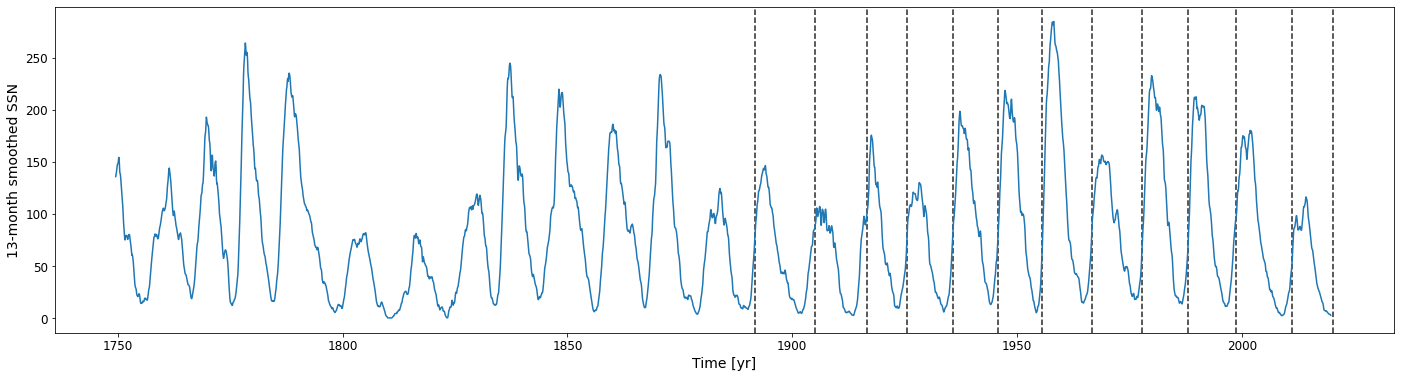

In [8]:
fig, ax = plt.subplots(figsize = [24, 6])
ax.set_ylabel('13-month smoothed SSN')
ax.set_xlabel('Time [yr]')
[ax.axvline(yi, ls='--', c='k', alpha=0.85) for yi in Tz['Term_SSN']]
ax.plot(SSN['frac_yr'], SSN['SSN'])

But... Leamon et al. (2020) only had data from 1947 to present, so adjust the data...

In [9]:
SSN = SSN[SSN['frac_yr'] >= 1945.0]

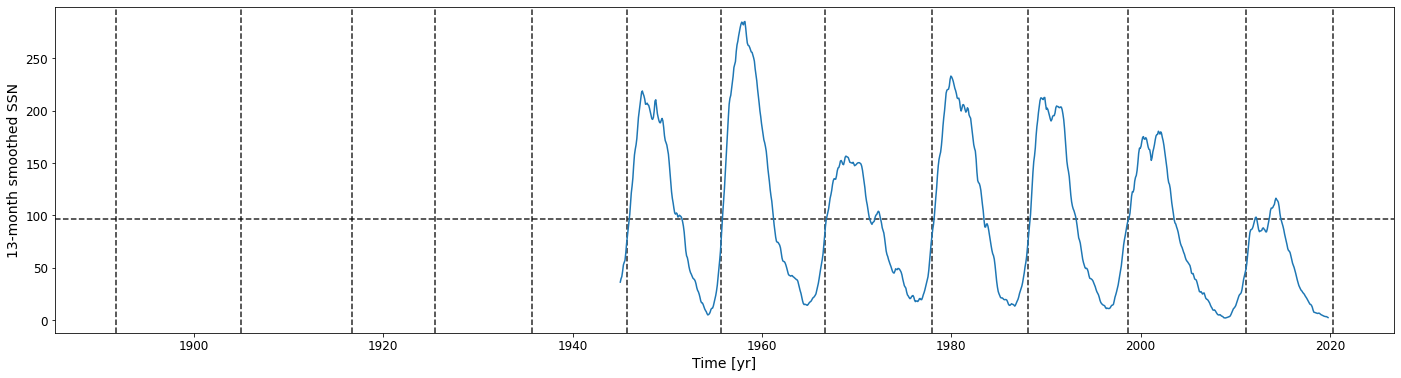

In [10]:
fig, ax = plt.subplots(figsize = [24, 6])
ax.set_ylabel('13-month smoothed SSN')
ax.set_xlabel('Time [yr]')
ax.axhline(np.mean(SSN['SSN']), ls='--', c='k', alpha=0.85)
[ax.axvline(yi, ls='--', c='k', alpha=0.85) for yi in Tz['Term_SSN']]
ax.plot(SSN['frac_yr'], SSN['SSN'])

Now we know that the Hilbert transform must be performed on a signal where the variations from the mean are larger than the mean itself. Hence we can think of separating the signal into two components:

$u(t) = A(t) + B(t)$

where: 
    - $u(t)$ is the full signal
    - $A(t)$ is the varying part of the signal
    - $B(t)$ is the small deviation of the signal from the mean
    
Therefore, we can pass $A(t) = u(t) - B(t)$ into the Hilbert transform if we use $B(t)$ as the signal mean.

In [11]:
mask = SSN['b'] == 1
print("Removed mean: %.3f"%(SSN['SSN'][mask].mean()))
signal = SSN['SSN'][mask].values - 76 #SSN['SSN'][mask].mean()
t = SSN['frac_yr'][mask].values

Removed mean: 96.941


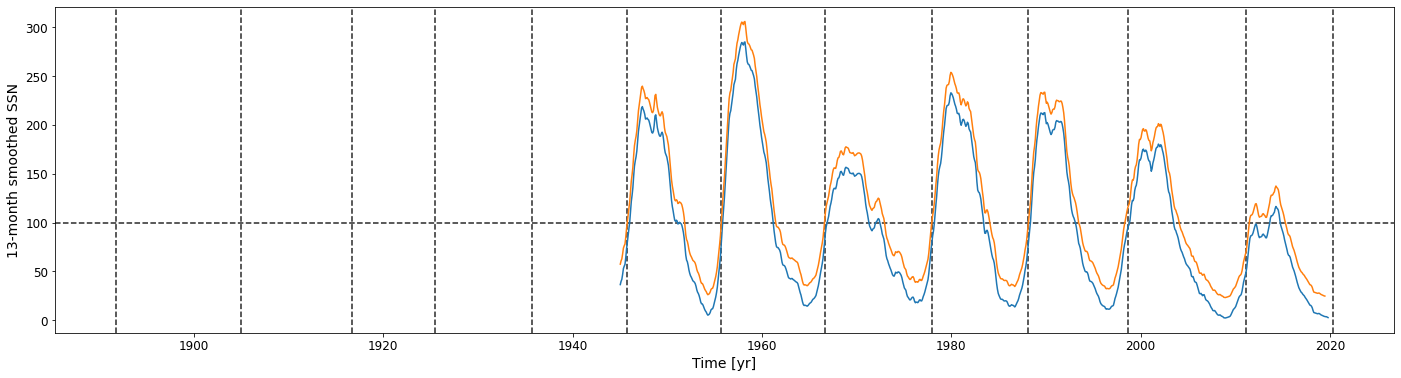

In [12]:
fig, ax = plt.subplots(figsize = [24, 6])
ax.set_ylabel('13-month smoothed SSN')
ax.set_xlabel('Time [yr]')
ax.axhline(100, ls='--', c='k', alpha=0.85)
[ax.axvline(yi, ls='--', c='k', alpha=0.85) for yi in Tz['Term_SSN']]
ax.plot(SSN['frac_yr'], SSN['SSN'])
ax.plot(t, signal + 96.941)

Let's do the Hilbert transform now...

In [13]:
mask = ~np.isnan(signal)
analytic_signal = hilbert(signal[mask])
amplitude_envelope = np.abs(analytic_signal)
#instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_phase = np.angle(analytic_signal)
#instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
#print(analytic_signal)
#print(instantaneous_phase)

/home/exr007/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


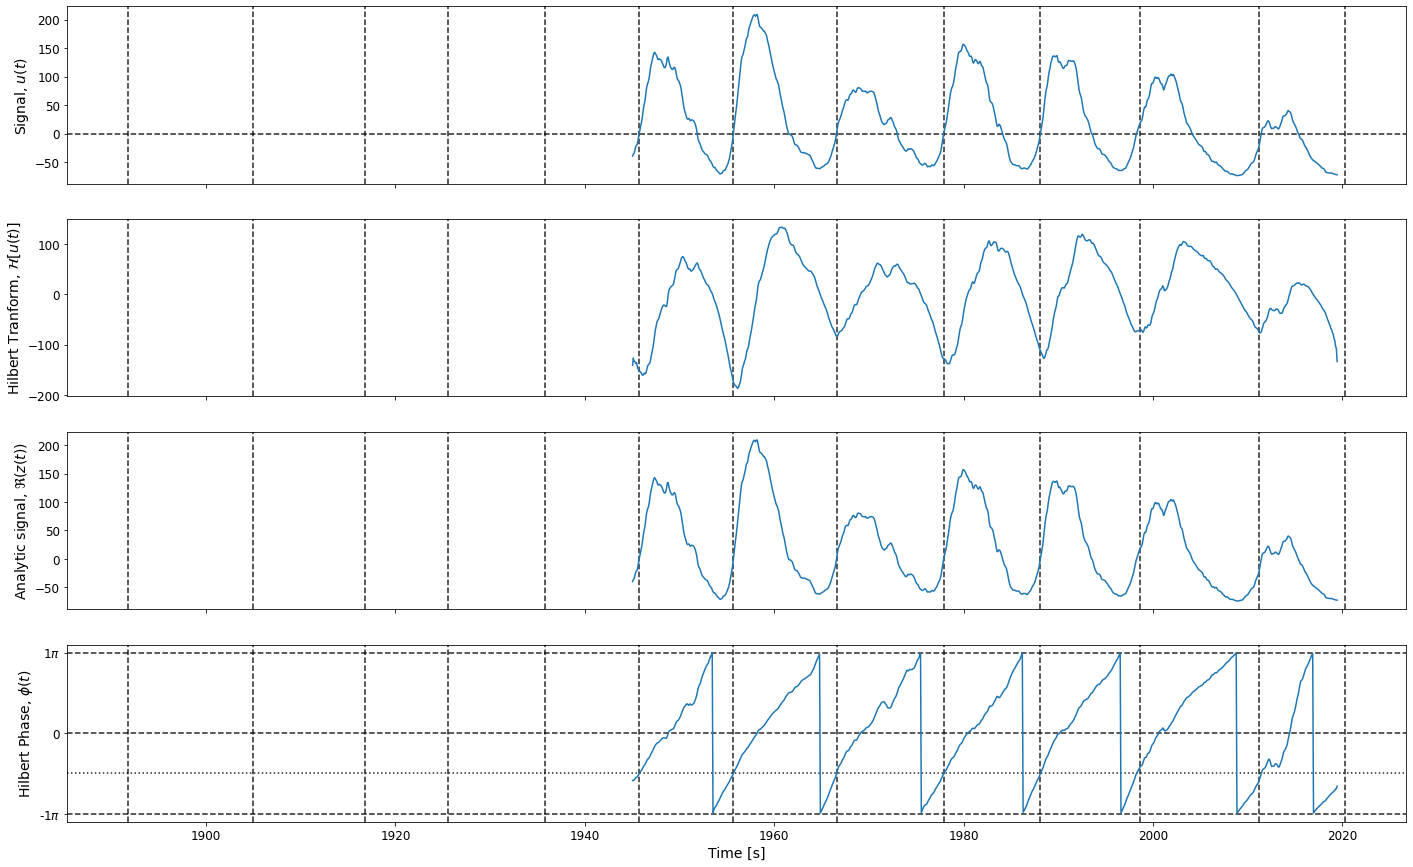

In [14]:
fig, axs= plt.subplots(4, 1, sharex=True, figsize = [24, 15])
axs[0].set_ylabel('Signal, $u(t)$')
axs[1].set_ylabel('Hilbert Tranform, $\mathcal{H}[u(t)]$')
axs[2].set_ylabel('Analytic signal, $\Re(z(t))$')
axs[3].set_ylabel('Hilbert Phase, $\phi(t)$')
axs[-1].set_xlabel('Time [s]')
axs[0].axhline(0, ls='--', c='k', alpha=0.85)
axs[0-1].axhline(0, ls='--', c='k', alpha=0.85)
axs[-1].axhline(-np.pi, ls='--', c='k', alpha=0.85)
axs[-1].axhline(-np.pi/2, ls=':', c='k', alpha=0.85)
axs[-1].axhline(np.pi, ls='--', c='k', alpha=0.85)
for ax in axs:
    [ax.axvline(yi, ls='--', c='k', alpha=0.85) for yi in Tz['Term_SSN']]
axs[0].plot(t, signal)
axs[1].plot(t, np.imag(analytic_signal))
axs[2].plot(t, analytic_signal)
axs[3].plot(t, instantaneous_phase)
from matplotlib.ticker import FuncFormatter, MultipleLocator
axs[3].yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
axs[3].yaxis.set_major_locator(MultipleLocator(base=np.pi))
start, end = axs[3].get_xlim()
#axs[3].xaxis.set_ticks(np.arange(start//1, end//1, 10))

This looks fairly similar to the results outlined in Leamon et al. (2020)... but the locations of the phase switches are not in alignment with those from Leamon et al. (2020)... Instaed, it looks like the terminator dates align well with the epoch where the instanteous phase crosses $-\pi/2$

## Try with less smoothed SSN data over only the last few solar cycles

Let's now read in the daily SSN data for cycles 22-24 and repeat the same process, i.e. take the Hilbert transform, combine for the analytic signal, and plot the outputs.

In [15]:
SSN = pd.read_csv('/mnt/storage/003. Data/006. SSN/SN_m_tot_V2.0.csv',
                  sep=';',
                  header=None,
                  index_col=[0,1,2])
import datetime
SSN.set_index([[datetime.datetime(di[0], di[1], di[2]) for di in SSN.index.values]], inplace=True)
SSN.columns = ['frac_yr', 'SSN', 'sigma', 'N', 'b']
SSN.replace(-1.0, np.nan, inplace=True)

Remove any data pre-1985...

In [16]:
limit_year = 1985
SSN = SSN[SSN['frac_yr'] >= limit_year]

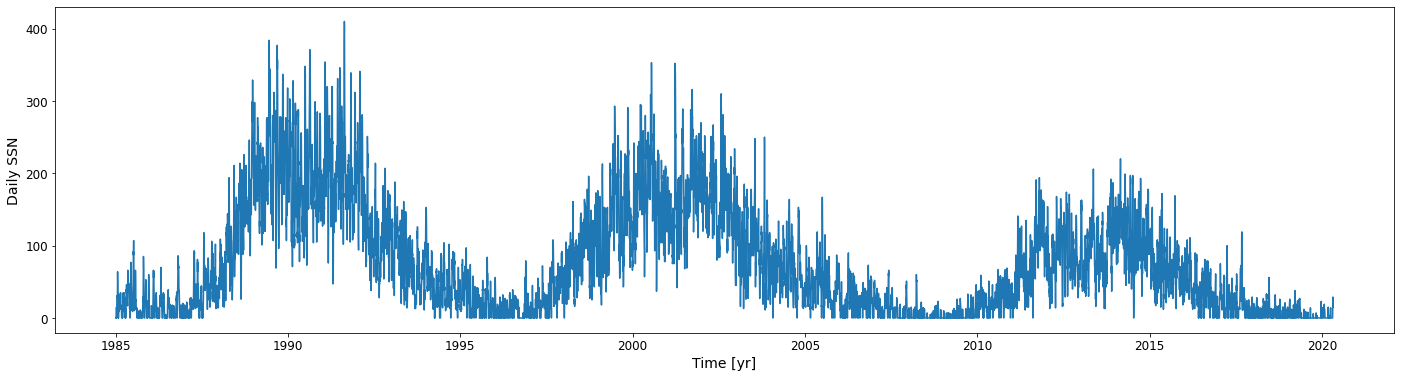

In [17]:
fig, ax = plt.subplots(figsize = [24, 6])
ax.set_ylabel('Daily SSN')
ax.set_xlabel('Time [yr]')
ax.plot(SSN['frac_yr'], SSN['SSN'])

In [18]:
mask = SSN['b'] == 1
signal = SSN['SSN'][mask].values - SSN['SSN'][mask].mean()
t = SSN['frac_yr'][mask].values

Let's do the Hilbert transform now...

In [19]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
#instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_phase = np.angle(analytic_signal)
#instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
analytic_signal

array([-75.61636549-56.97522449j, -75.61636549-58.5136814j ,
       -75.61636549-59.7329193j , ..., -75.61636549-53.20956243j,
       -75.61636549-54.35576816j, -75.61636549-56.01461417j])

/home/exr007/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


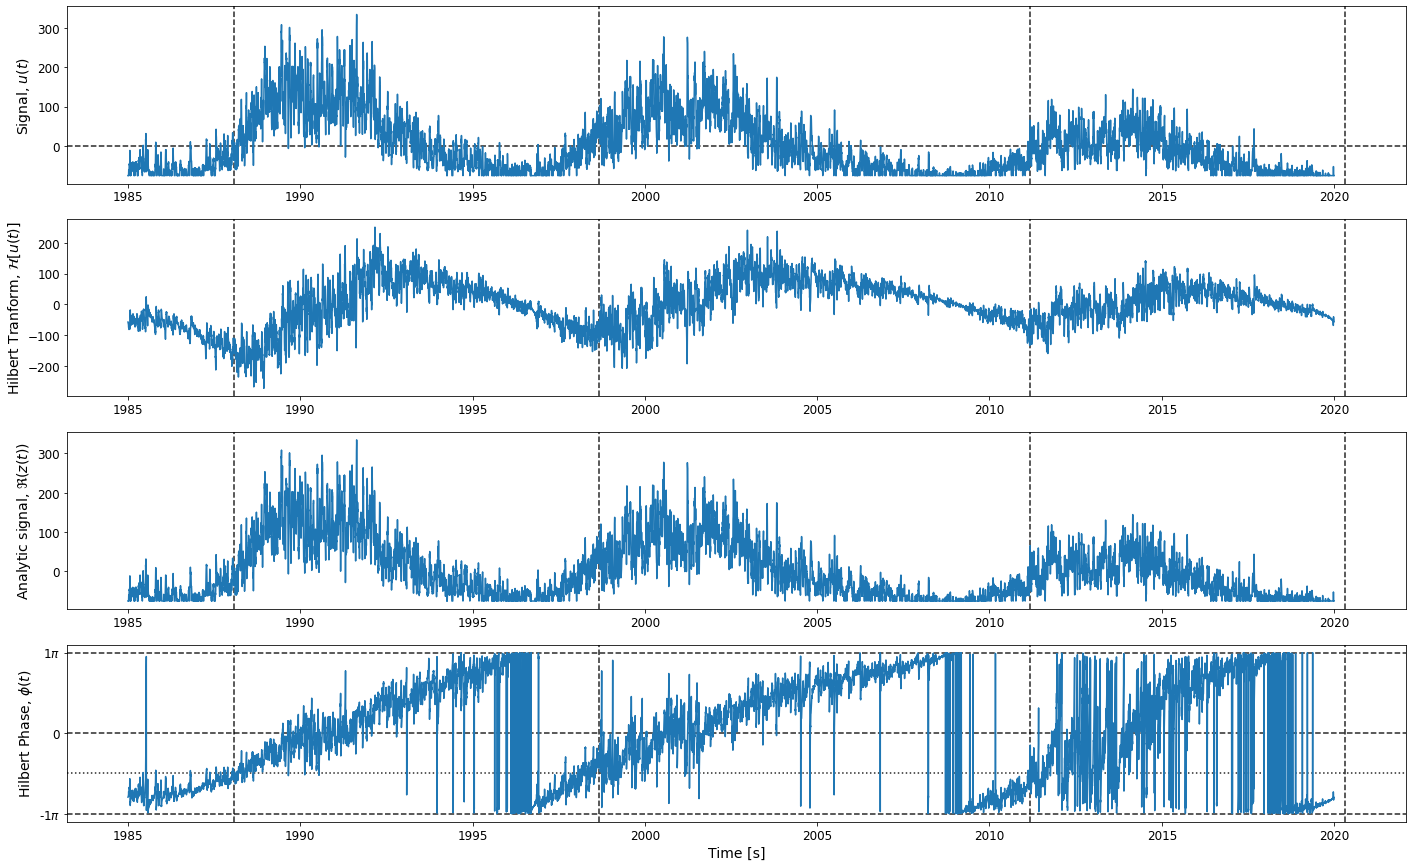

In [20]:
fig, axs= plt.subplots(4, 1, figsize = [24, 15])
axs[0].set_ylabel('Signal, $u(t)$')
axs[1].set_ylabel('Hilbert Tranform, $\mathcal{H}[u(t)]$')
axs[2].set_ylabel('Analytic signal, $\Re(z(t))$')
axs[3].set_ylabel('Hilbert Phase, $\phi(t)$')
axs[-1].set_xlabel('Time [s]')
axs[0].axhline(0, ls='--', c='k', alpha=0.85)
axs[0-1].axhline(0, ls='--', c='k', alpha=0.85)
axs[-1].axhline(-np.pi, ls='--', c='k', alpha=0.85)
axs[-1].axhline(-np.pi/2, ls=':', c='k', alpha=0.85)
axs[-1].axhline(np.pi, ls='--', c='k', alpha=0.85)
for ax in axs:
    [ax.axvline(yi, ls='--', c='k', alpha=0.85) if yi >= limit_year else None for yi in Tz['Term_SSN']]
axs[0].plot(t, signal)
axs[1].plot(t, np.imag(analytic_signal))
axs[2].plot(t, analytic_signal)
axs[3].plot(t, instantaneous_phase)
from matplotlib.ticker import FuncFormatter, MultipleLocator
axs[3].yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
axs[3].yaxis.set_major_locator(MultipleLocator(base=np.pi))